<a href="https://colab.research.google.com/github/ntrnhung/python_projects/blob/main/Pandas_and_Matplotlib_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

## Import Statements

In [ ]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv("QueryResults.csv")


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()
df.tail()

,m,TagName,Unnamed: 2
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [ ]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

,0
m,1991
TagName,1991
Unnamed: 2,1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.rename(columns={'Unnamed: 2': 'PostCount'}, inplace=True)
total_posts_per_language = df.groupby('TagName')['PostCount'].sum()
sorted_total_posts = total_posts_per_language.sort_values(ascending=False)
print(sorted_total_posts)

TagName
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: PostCount, dtype: int64


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
df.columns = ['Date', 'TagName', 'PostCount']
months_per_language = df.groupby('TagName')['Date'].count()
fewest_months_language = months_per_language.sort_values(ascending=True)
fewest_entry_language = fewest_months_language.head(1)
print(fewest_entry_language)

TagName
go    129
Name: Date, dtype: int64


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,TagName,PostCount
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index='Date', columns='TagName', values='PostCount')
print(reshaped_df)

TagName     assembly       c       c#     c++  delphi     go     java  \
Date                                                                    
2008-07-01       NaN     NaN      3.0     NaN     NaN    NaN      NaN   
2008-08-01       8.0    85.0    511.0   164.0    14.0    NaN    222.0   
2008-09-01      28.0   321.0   1649.0   755.0   105.0    NaN   1137.0   
2008-10-01      15.0   303.0   1989.0   811.0   112.0    NaN   1153.0   
2008-11-01      17.0   259.0   1730.0   735.0   141.0    NaN    958.0   
...              ...     ...      ...     ...     ...    ...      ...   
2020-03-01     317.0  2670.0   8954.0  5107.0   181.0  719.0  13253.0   
2020-04-01     406.0  3472.0  10042.0  6820.0   250.0  887.0  15377.0   
2020-05-01     386.0  3602.0   9923.0  7063.0   221.0  826.0  14711.0   
2020-06-01     363.0  2757.0   9064.0  6161.0   214.0  765.0  13015.0   
2020-07-01     298.0  2294.0   9145.0  5756.0   212.0  743.0  12723.0   

TagName     javascript   perl     php   python    

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
print(reshaped_df.shape)

(145, 14)


In [ ]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')


In [ ]:
print(reshaped_df.head())

TagName     assembly      c      c#    c++  delphi  go    java  javascript  \
Date                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   85.0   511.0  164.0    14.0 NaN   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0 NaN  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0 NaN  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0 NaN   958.0       579.0   

TagName      perl    php  python    r   ruby  swift  
Date                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  161.0   124.0  NaN   73.0    NaN  
2008-09-01  131.0  482.0   542.0  6.0  290.0    NaN  
2008-10-01  127.0  617.0   510.0  NaN  249.0    NaN  
2008-11-01   97.0  504.0   452.0  1.0  160.0    NaN  


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [ ]:
print(reshaped_df.count())

TagName
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64


In [ ]:
reshaped_df.fillna(0, inplace=True)
print(reshaped_df.head())

TagName     assembly      c      c#    c++  delphi   go    java  javascript  \
Date                                                                          
2008-07-01       0.0    0.0     3.0    0.0     0.0  0.0     0.0         0.0   
2008-08-01       8.0   85.0   511.0  164.0    14.0  0.0   222.0       162.0   
2008-09-01      28.0  321.0  1649.0  755.0   105.0  0.0  1137.0       640.0   
2008-10-01      15.0  303.0  1989.0  811.0   112.0  0.0  1153.0       725.0   
2008-11-01      17.0  259.0  1730.0  735.0   141.0  0.0   958.0       579.0   

TagName      perl    php  python    r   ruby  swift  
Date                                                 
2008-07-01    0.0    0.0     0.0  0.0    0.0    0.0  
2008-08-01   28.0  161.0   124.0  0.0   73.0    0.0  
2008-09-01  131.0  482.0   542.0  6.0  290.0    0.0  
2008-10-01  127.0  617.0   510.0  0.0  249.0    0.0  
2008-11-01   97.0  504.0   452.0  1.0  160.0    0.0  


In [ ]:
print(reshaped_df.isna().values.any())

False


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

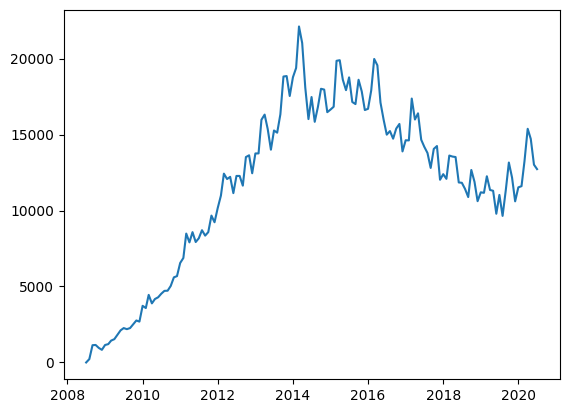

In [ ]:
import matplotlib.pyplot as plt
plt.plot(reshaped_df.index, reshaped_df['java'])

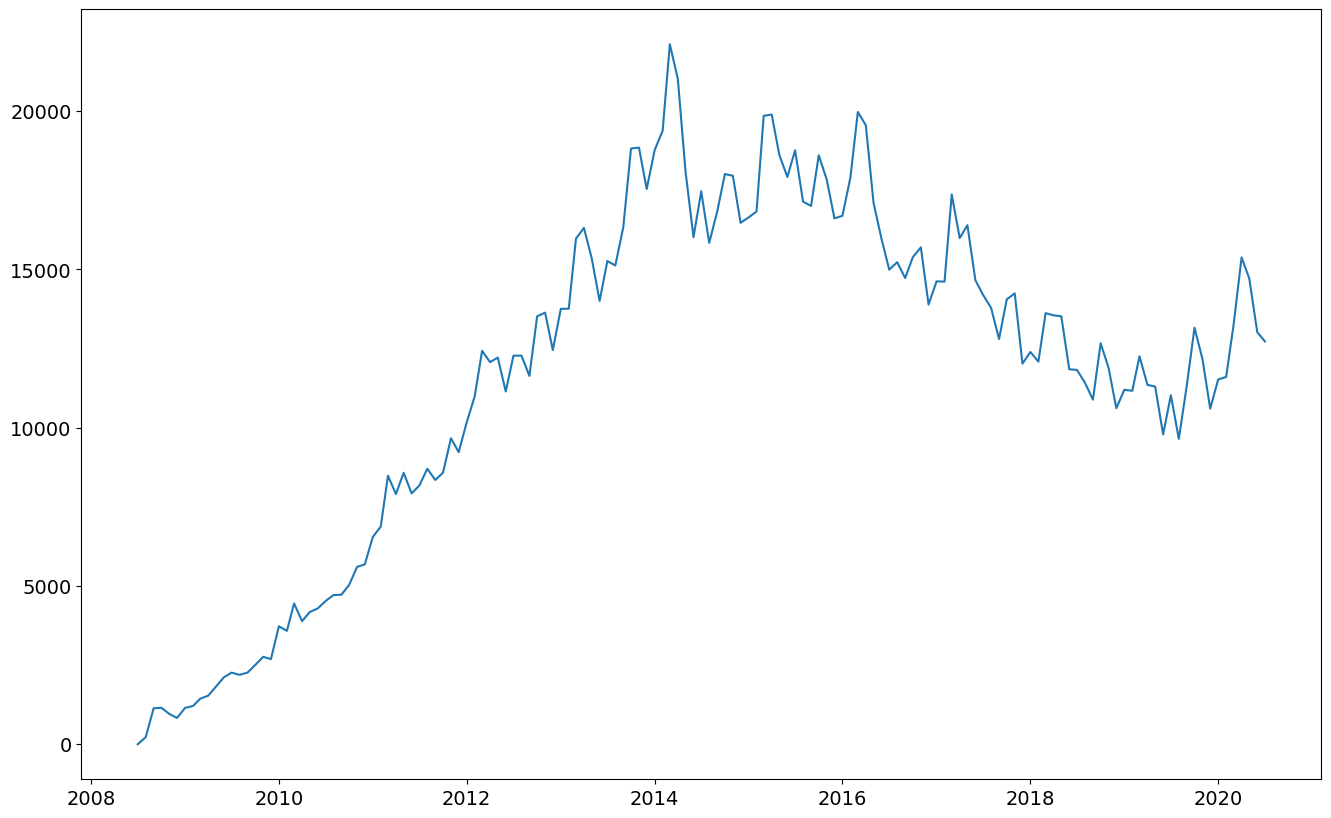

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df.java)

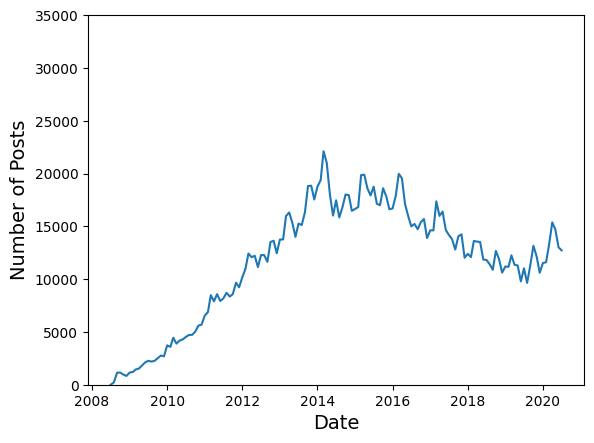

In [ ]:
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

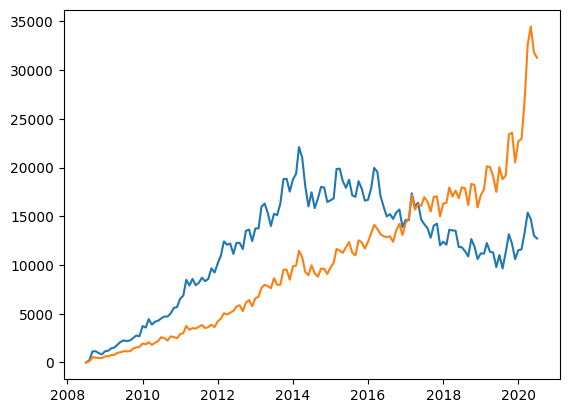

In [ ]:
plt.plot(reshaped_df.index, reshaped_df['java'], label='Java')
plt.plot(reshaped_df.index, reshaped_df['python'], label='Python')

Text(0, 0.5, 'Number of Posts')

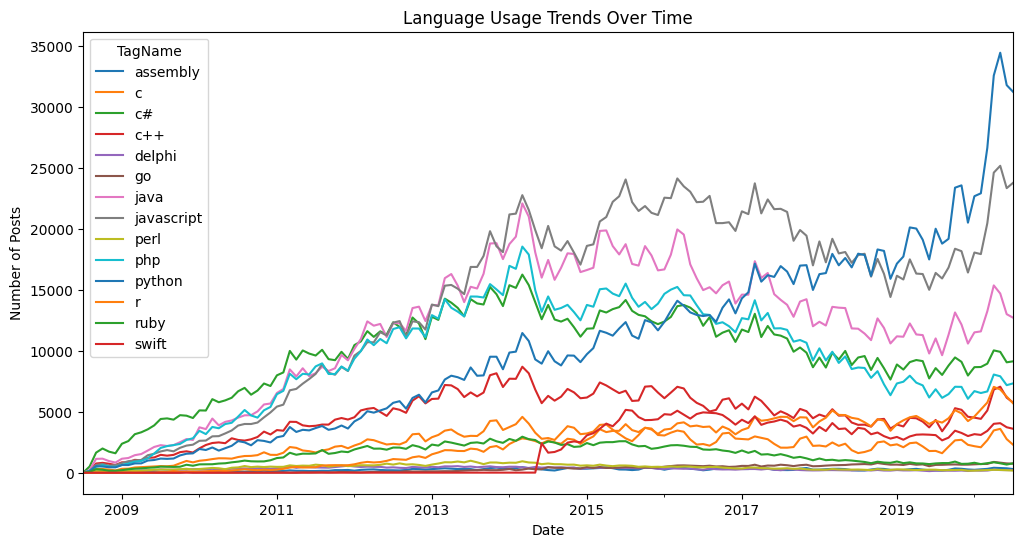

In [ ]:
ax = reshaped_df.plot(
    kind='line',
    figsize=(12, 6),
    title='Language Usage Trends Over Time'
)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Posts')

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

Text(0, 0.5, 'Number of Posts')

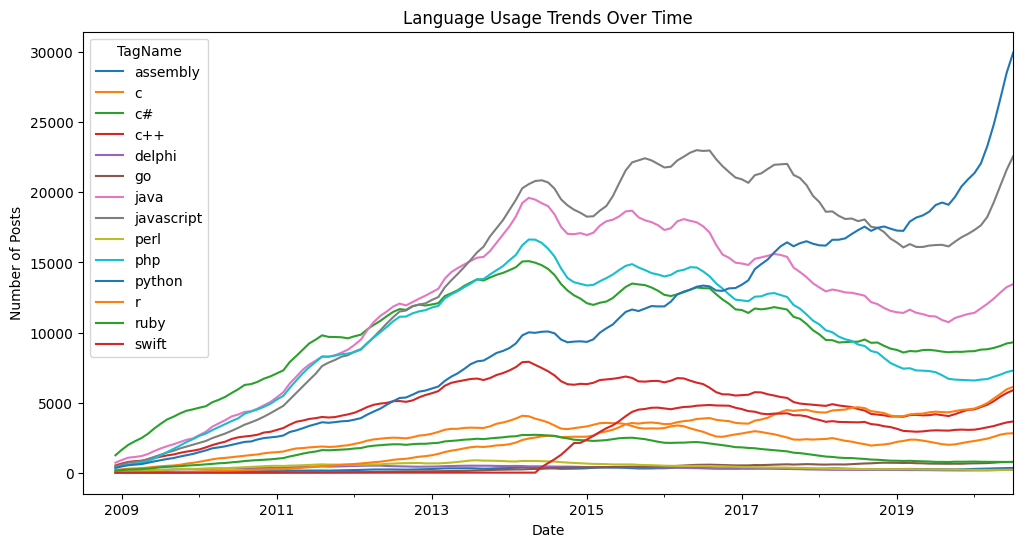

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()
ax = roll_df.plot(
    kind='line',
    figsize=(12, 6),
    title='Language Usage Trends Over Time'
)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Posts')